## Adapted from Kaggle notebooks
+ [Data Visualization](https://www.kaggle.com/code/vijayveersingh/1-data-visualization-california-wildfire-data)

In [ ]:
import numpy as np
import pandas as pd

# pandas w/ support for geojson files
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load GeoJSON file
geo_data = gpd.read_file('data/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

geo_data.head()

,OBJECTID,DAMAGE,STREETNUMBER,STREETNAME,STREETTYPE,STREETSUFFIX,CITY,STATE,ZIPCODE,CALFIREUNIT,...,UTILITYMISCSTRUCTUREDISTANCE,FIRENAME,APN,ASSESSEDIMPROVEDVALUE,YEARBUILT,SITEADDRESS,GLOBALID,Latitude,Longitude,geometry
0,1,No Damage,8376.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,None,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,POINT (-13585927.697 4646740.75)
1,2,Affected (1-9%),8402.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,None,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,POINT (-13585792.707 4647093.599)
2,3,No Damage,8430.0,Quail Canyon,Road,None,Winters,CA,NaN,LNU,...,None,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,POINT (-13585941.007 4647366.034)
3,4,No Damage,3838.0,Putah Creek,Road,None,Winters,CA,NaN,LNU,...,None,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,POINT (-13582660.52 4648497.399)
4,5,No Damage,3830.0,Putah Creek,Road,None,Winters,CA,NaN,LNU,...,None,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,POINT (-13582772.601 4648258.826)


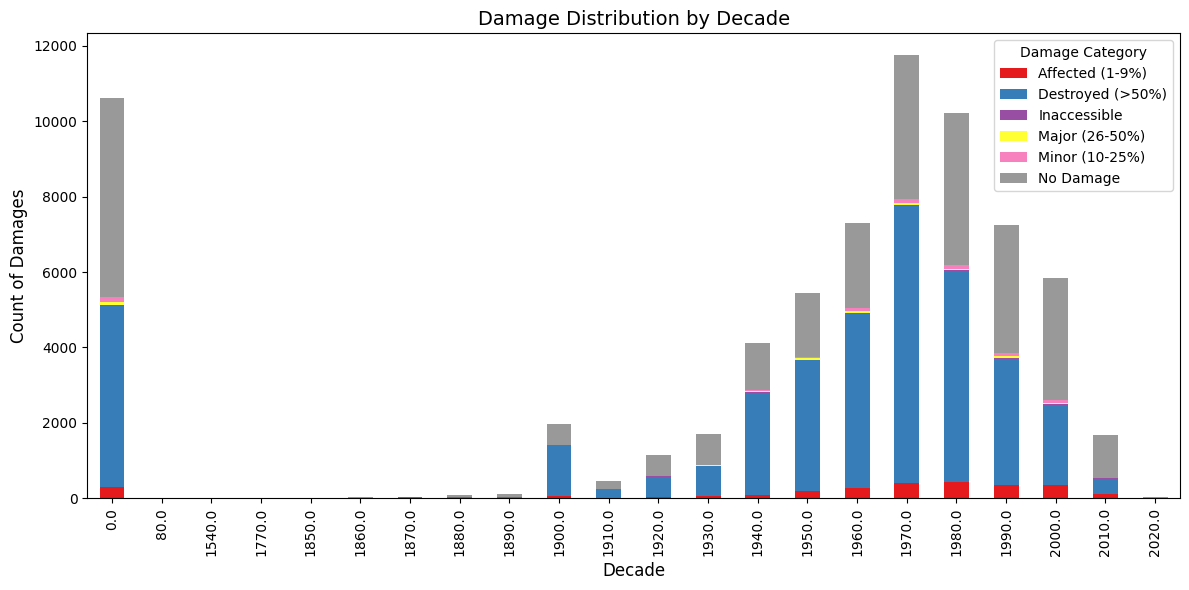

In [5]:
# Create a 'Decade' column by grouping the 'YEARBUILT' into decades
geo_data['Decade'] = (geo_data['YEARBUILT'] // 10) * 10

# Group data by Decade and DAMAGE, count occurrences
damage_by_decade = geo_data.groupby(['Decade', 'DAMAGE']).size().unstack().fillna(0)

# Plot stacked bar plot for damage distribution by Decade with 'Set1' color palette
damage_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set1')

# Customize plot
plt.title("Damage Distribution by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Count of Damages", fontsize=12)
plt.legend(title="Damage Category", fontsize=10)
plt.tight_layout()
plt.show()

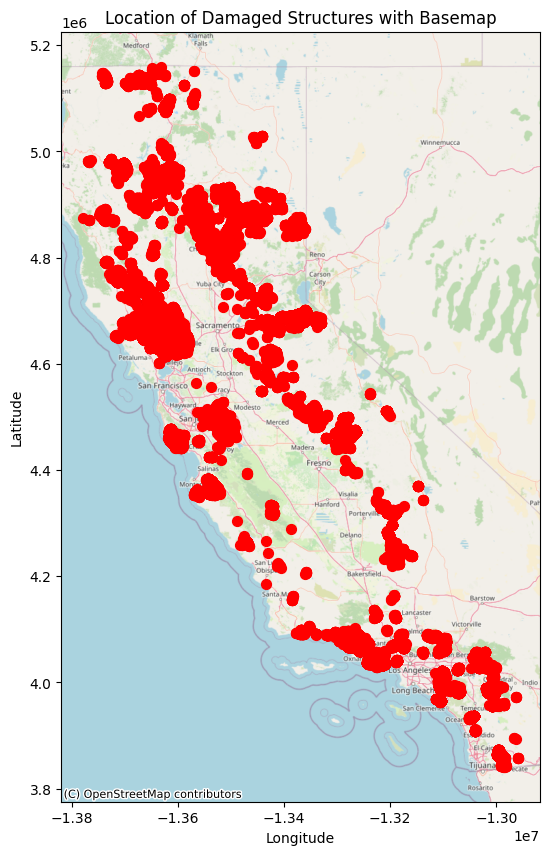

In [8]:
import contextily as ctx

# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, color='red', markersize=50)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()